In [1]:
import pandas as pd
import os
import numpy as np
import funkcje as f
import funkcja_choose_benefit as bc
import matplotlib.pyplot as plt
import seaborn as sns

path = os.path.abspath("dane")
rate2016_df = pd.read_csv(os.path.join(path, "Rate2016.csv"))
rate2015_df = pd.read_csv(os.path.join(path, "Rate2015.csv"))
rate2014_df = pd.read_csv(os.path.join(path, "Rate2014.csv"))
network_df = pd.read_csv(os.path.join(path, "Network.csv"))
pa_df = pd.read_csv(os.path.join(path, "PlanAttributes.csv"))
df_bcs = pd.read_csv(os.path.join(path, "BenefitsCostSharing2016.csv"))

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,10,11,12,32,33,34,40,41,42,149,151,152,153) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,6,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
print("Aplikacja służąca do wyboru ubezpieczenia zdrowotnego\n")
print("W pierwszym kroku zadamy Ci kilka pytań dotyczących Twoich preferencji dotyczących ubezpieczenia:")


state_code = f.choose_state()
age,option = f.get_data()

plan_output = f.show_final(state_code, age, option, network_df, pa_df, rate2016_df, rate2015_df, rate2014_df)
if plan_output.empty:
    print("\nNiestety nie dyspozujemy planem ubezpieczeniowym dla podanych kryteriów")
else:
    print("\nPoniżej znajdują się wybrane dla Ciebie plany ubezpieczeniowe:")

plan_output



# plan_output = f.show_result(state_code, age, option, network_df, pa_df, rate_df) 
# if plan_output.empty:
#     print("\nNiestety nie dyspozujemy planem ubezpieczeniowym dla podanych kruteriów")
# else:
#     print("\nPoniżej znajdują się wybrane dla Ciebie plany ubezpieczeniowe:")
# plan_output

Aplikacja służąca do wyboru ubezpieczenia zdrowotnego

W pierwszym kroku zadamy Ci kilka pytań dotyczących Twoich preferencji dotyczących ubezpieczenia:

Lista state codes:
['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN', 'KS', 'LA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WV', 'WY']

Podaj kod stanu, w którym chcesz się ubezpieczyć:AK
Czy chcesz się ubezpieczyć z rodziną? y/n:n

Podaj swój wiek:30

Poniżej znajdują się wybrane dla Ciebie plany ubezpieczeniowe:


,IndividualRate,PlanId,PlanMarketingName,NetworkName
0,25.84,47904AK0070002,"Delta Dental Individual PPO, EHB Certified",Renaissance Dental
1,519.00,73836AK0850002,Moda Health Providence Be Secure,Endeavor Select
2,602.00,38344AK0570001,"Blue Cross Blue Shield Plus 5250 HSA HIGH, a M...",HeritagePlus
3,719.00,38344AK0570002,"Blue Cross Blue Shield Plus 3000 HSA HIGH, a M...",HeritagePlus


Text(0, 0.5, 'Cena miesieczna $')

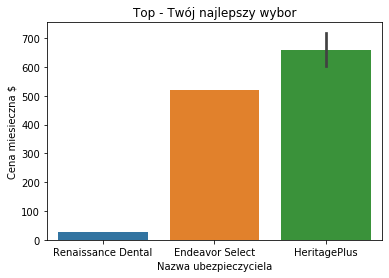

In [75]:
#Rysunje wykres wybranych obcji
plan_output
if age=="Family Option":
    Rate=plan_output["Couple"]
else:
    Rate=plan_output["IndividualRate"]

    
PlanName=plan_output["NetworkName"]

sns.barplot(x=PlanName, y=Rate)
plt.title("Top - Twój najlepszy wybor")
plt.xlabel("Nazwa ubezpieczyciela")
plt.ylabel("Cena miesieczna $")


In [76]:
print("W poniższej tabeli są zaprezentowane benefity, dla każdego z czterech powyższych planów")
bc.choose_benefit(plan_output, df_bcs)

W poniższej tabeli są zaprezentowane benefity, dla każdego z czterech powyższych planów


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,47904AK0070002,Routine Dental Services (Adult),50%,2,Visit(s) per Benefit Period
1,47904AK0070002,Dental Check-Up for Children,0%,1,Visit(s) per 6 Months
2,47904AK0070002,Basic Dental Care - Child,50% Coinsurance after deductible,N/A,N/A
3,47904AK0070002,Major Dental Care - Child,50% Coinsurance after deductible,N/A,N/A
4,47904AK0070002,Basic Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A
5,47904AK0070002,Major Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A
6,47904AK0070002,Accidental Dental,50%,N/A,N/A
7,73836AK0850002,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
8,73836AK0850002,Basic Dental Care - Child,40% Coinsurance after deductible,N/A,N/A
9,73836AK0850002,Major Dental Care - Child,40% Coinsurance after deductible,N/A,N/A
